In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [17]:
history_df = pd.read_csv('TCS_stock_history.csv')

In [18]:
action_df = pd.read_csv('TCS_stock_action.csv')

In [19]:
info_df = pd.read_csv('TCS_stock_info.csv')

In [20]:
history_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [21]:
action_df.head()

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


In [22]:
info_df.head()

,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999


In [23]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [24]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70 non-null     object 
 1   Dividends     70 non-null     float64
 2   Stock Splits  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


In [25]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   400001  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [26]:
print("History dataset missing values:\n", history_df.isnull().sum())
print("\nAction dataset missing values:\n", action_df.isnull().sum())
print("\nInfo dataset missing values:\n", info_df.isnull().sum())

History dataset missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Action dataset missing values:
 Date            0
Dividends       0
Stock Splits    0
dtype: int64

Info dataset missing values:
 zip        0
400001    42
dtype: int64


In [27]:
history_df['Date'] = pd.to_datetime(history_df['Date'])

In [28]:
history_df = history_df.sort_values('Date')

In [29]:
history_df.reset_index(drop=True, inplace=True)

In [30]:
history_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [31]:
history_df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [32]:
action_df['Date'] = pd.to_datetime(action_df['Date'])
action_df = action_df.sort_values('Date')

In [33]:
history_df['Daily_Return'] = history_df['Close'].pct_change()

In [34]:
history_df['MA_7'] = history_df['Close'].rolling(window=7).mean()
history_df['MA_30'] = history_df['Close'].rolling(window=30).mean()

In [35]:
history_df['Volatility'] = history_df['Daily_Return'].rolling(window=30).std()

In [36]:
history_df.head(15)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,MA_7,MA_30,Volatility
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.013539,NaN,NaN,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-0.068944,NaN,NaN,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000,NaN,NaN,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.002400,NaN,NaN,NaN
5,2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0,-0.024742,NaN,NaN,NaN
6,2002-08-20,26.563503,28.794168,26.386910,27.111877,3773624,0.0,0.0,0.027837,27.628381,NaN,NaN
7,2002-08-21,28.608262,29.147341,27.158333,28.440964,3011064,0.0,0.0,0.049022,27.474356,NaN,NaN
8,2002-08-22,29.379720,30.913303,29.231009,29.667849,6732480,0.0,0.0,0.043138,27.552695,NaN,NaN
9,2002-08-23,29.928077,32.437575,29.565595,31.452364,4841672,0.0,0.0,0.060150,28.172765,NaN,NaN


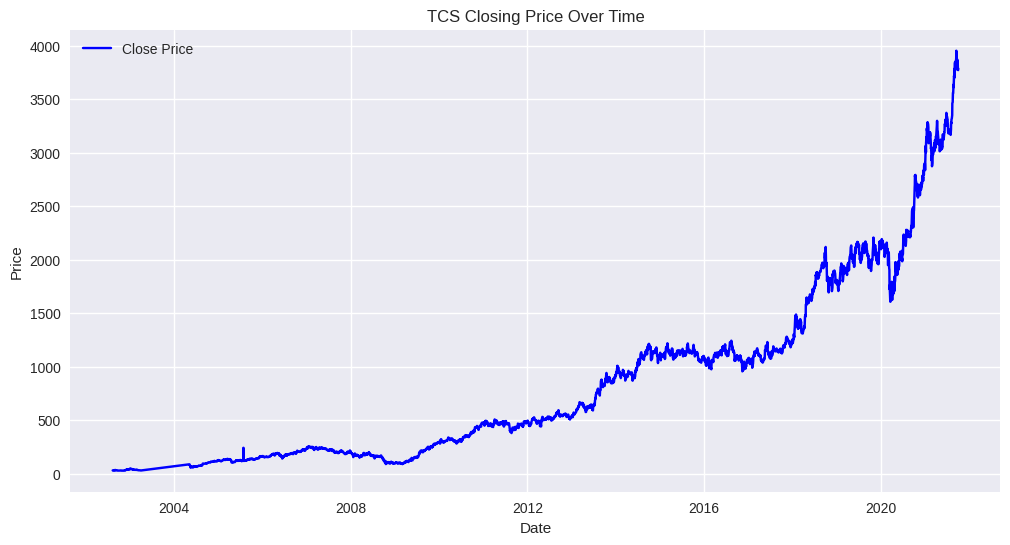

In [37]:
plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'], label='Close Price', color='blue')
plt.title('TCS Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

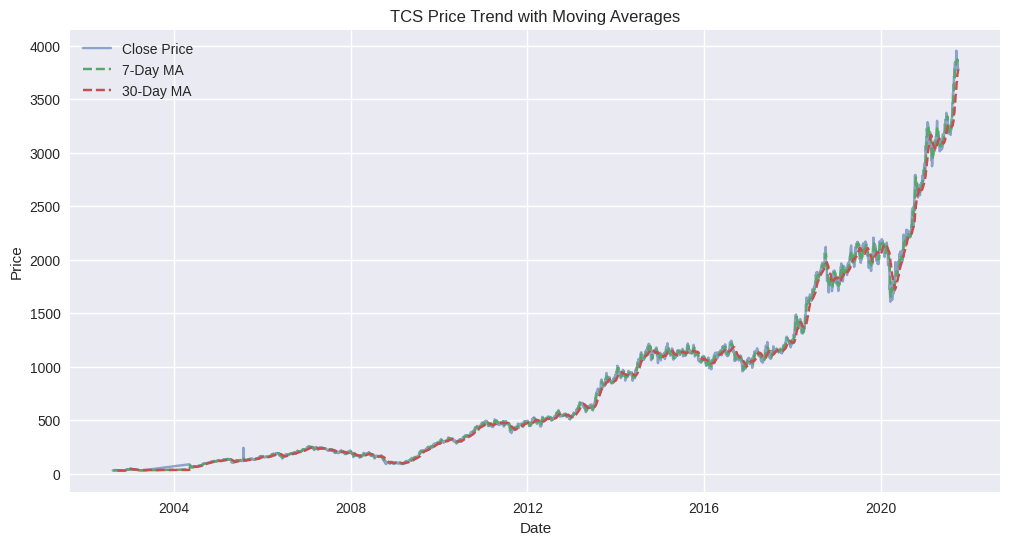

In [38]:
plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'], label='Close Price', alpha=0.6)
plt.plot(history_df['Date'], history_df['MA_7'], label='7-Day MA', linestyle='--')
plt.plot(history_df['Date'], history_df['MA_30'], label='30-Day MA', linestyle='--')

plt.title('TCS Price Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

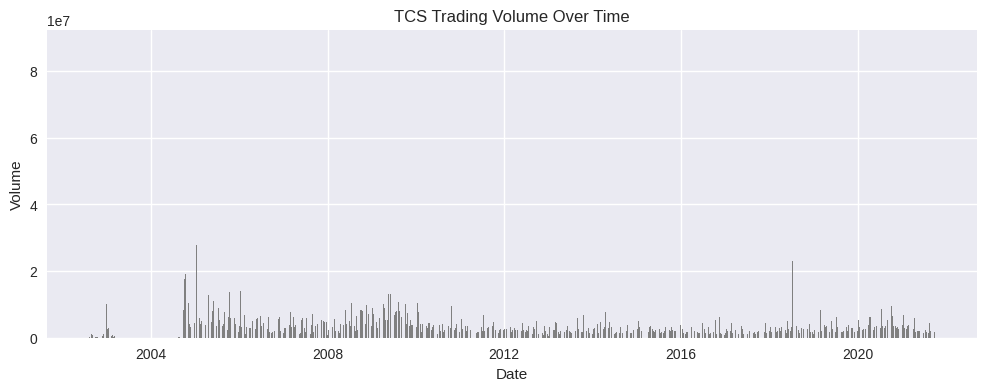

In [39]:
plt.figure(figsize=(12,4))
plt.bar(history_df['Date'], history_df['Volume'], color='grey')
plt.title('TCS Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

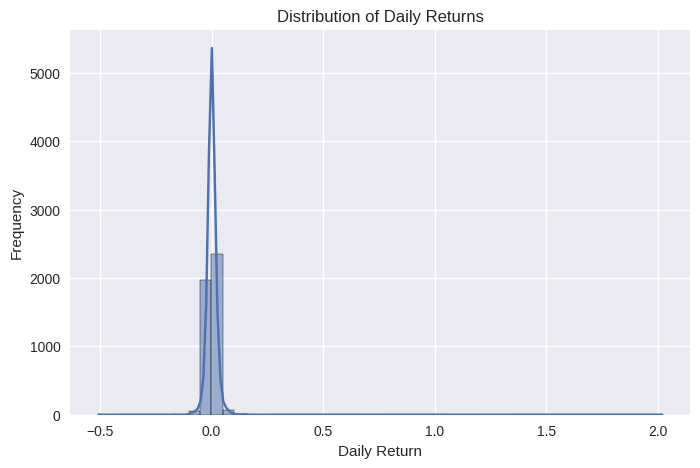

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(history_df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

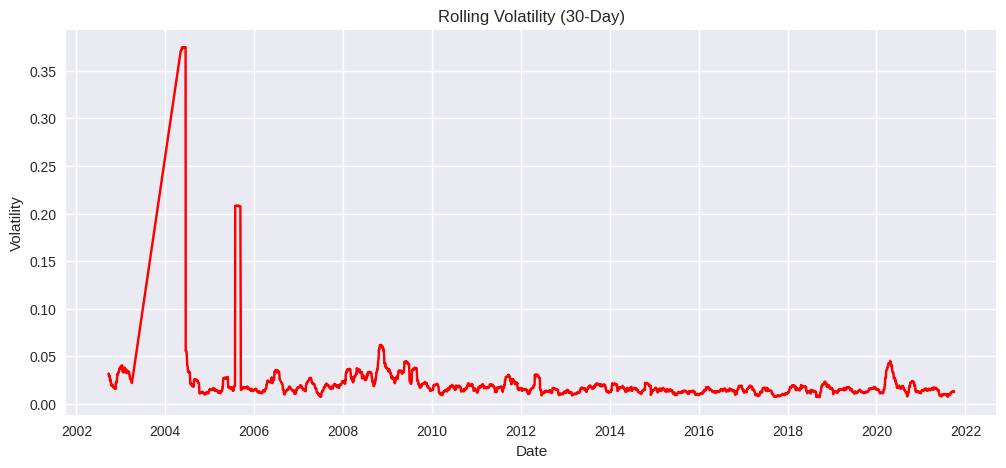

In [41]:
plt.figure(figsize=(12,5))
plt.plot(history_df['Date'], history_df['Volatility'], color='red')
plt.title('Rolling Volatility (30-Day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [42]:
action_df.head()

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


In [43]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          70 non-null     datetime64[ns]
 1   Dividends     70 non-null     float64       
 2   Stock Splits  70 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


In [44]:
action_events = action_df[
    (action_df['Dividends'] != 0) | (action_df['Stock Splits'] != 0)
]
action_events

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
...,...,...,...
65,2020-07-16,5.0000,0.0
66,2020-10-14,12.0000,0.0
67,2021-01-14,6.0000,0.0
68,2021-05-25,15.0000,0.0


In [45]:
merged_df = pd.merge(
    history_df,
    action_df,
    on='Date',
    how='left'
)
merged_df[['Dividends_y', 'Stock Splits_y']] = merged_df[['Dividends_y', 'Stock Splits_y']].fillna(0)

In [46]:
merged_df.drop(columns=['Dividends_x', 'Stock Splits_x'], inplace=True, errors='ignore')

In [47]:
merged_df.rename(columns={
    'Dividends_y': 'Dividends',
    'Stock Splits_y': 'Stock_Splits'
}, inplace=True)

In [48]:
merged_df[['Date', 'Close', 'Dividends', 'Stock_Splits']].head(10)

,Date,Close,Dividends,Stock_Splits
0,2002-08-12,29.519140,0.0,0.0
1,2002-08-13,29.119476,0.0,0.0
2,2002-08-14,27.111877,0.0,0.0
3,2002-08-15,27.111877,0.0,0.0
4,2002-08-16,27.046812,0.0,0.0
5,2002-08-19,26.377609,0.0,0.0
6,2002-08-20,27.111877,0.0,0.0
7,2002-08-21,28.440964,0.0,0.0
8,2002-08-22,29.667849,0.0,0.0
9,2002-08-23,31.452364,0.0,0.0


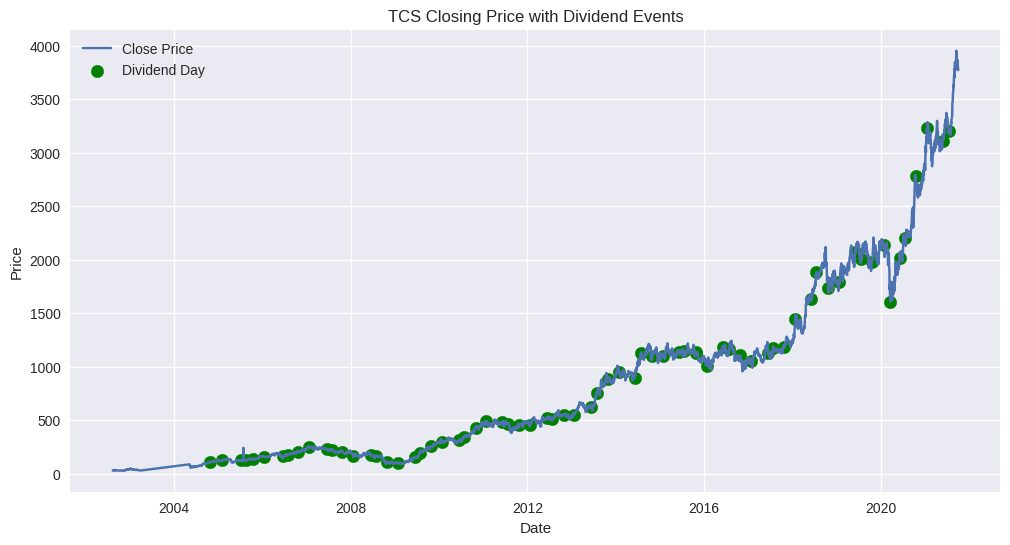

In [49]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price')

dividend_days = merged_df[merged_df['Dividends'] > 0]
plt.scatter(dividend_days['Date'], dividend_days['Close'],
            color='green', label='Dividend Day', s=80)

plt.title('TCS Closing Price with Dividend Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

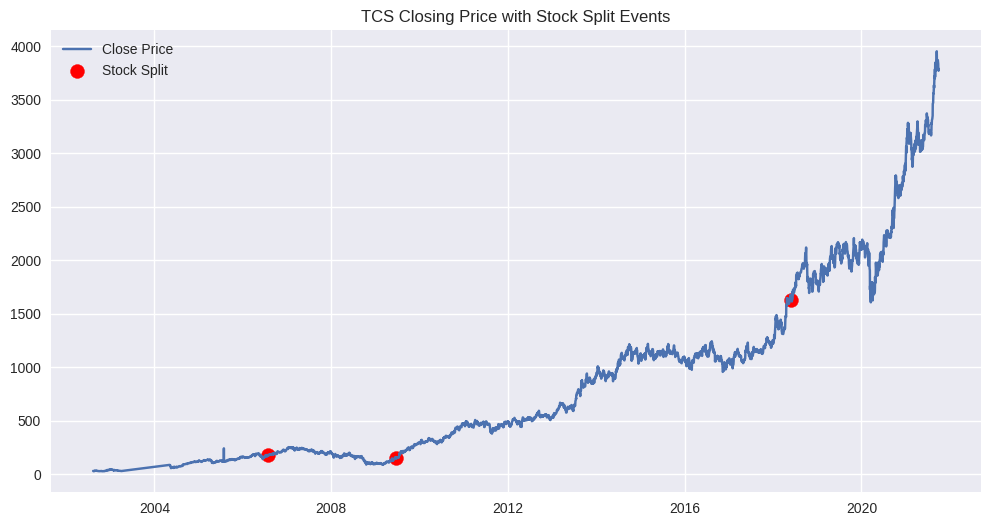

In [51]:
split_days = merged_df[merged_df['Stock_Splits'] > 0]

if not split_days.empty:
    plt.figure(figsize=(12,6))
    plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price')
    plt.scatter(split_days['Date'], split_days['Close'],
                color='red', label='Stock Split', s=100)
    plt.title('TCS Closing Price with Stock Split Events')
    plt.legend()
    plt.show()

In [52]:
avg_price = merged_df['Close'].mean()
max_price = merged_df['High'].max()
min_price = merged_df['Low'].min()

avg_price, max_price, min_price

(np.float64(866.537398487256), 3981.75, 24.146938217479043)

In [53]:
avg_volatility = merged_df['Daily_Return'].std()
avg_volatility

0.040109026159046865

In [54]:
total_volume = merged_df['Volume'].sum()
avg_volume = merged_df['Volume'].mean()

total_volume, avg_volume

(np.int64(15789542192), np.float64(3537876.3593995073))

In [55]:
total_dividends = merged_df['Dividends'].sum()
split_events = merged_df[merged_df['Stock_Splits'] > 0].shape[0]

total_dividends, split_events

(np.float64(319.25), 3)

In [56]:
final_df = merged_df.copy()
final_df.columns = final_df.columns.str.replace(' ', '_')

In [57]:
final_df.to_csv('TCS_final_stock_data.csv', index=False)